In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# Introduction

In this seminar assignment, we will explore the data and build machine-learning models that predict the biodegradability of chemicals.

[Data set](https://www.openml.org/search?type=data&status=active&id=1494&sort=runs) containing values for 
**41 attributes** (`molecular descriptors`) used to classify 1055 chemicals into **2 classes** (`ready` and `not ready` biodegradable).

## Attribute information

41 molecular descriptors (features) and 1 experimental class:

| Feature Name | Feature Information (Molecular Descriptor) | Type | Distinct values / Missing attributes |
| --- | --- | --- | --- |
| Class (target) | ready biodegradable (RB) and not ready biodegradable (NRB) | nominal | 2/0 |
| V1  | SpMax_L: Leading eigenvalue from Laplace matrix | numeric | 440/0 |
| V2  | J_Dz(e): Balaban-like index from Barysz matrix weighted by Sanderson electronegativity | numeric | 1022/0 |
| V3  | nHM: Number of heavy atoms | numeric | 11/0 |
| V4  | F01\[N-N\]: Frequency of N-N at topological distance 1 | numeric | 4/0 |
| V5  | F04\[C-N\]: Frequency of C-N at topological distance 4 | numeric | 16/0 |
| V6  | NssssC: Number of atoms of type ssssC | numeric | 13/0 |
| V7  | nCb-: Number of substituted benzene C(sp2) | numeric | 15/0 |
| V8  | C%: Percentage of C atoms | numeric | 188/0 |
| V9  | nCp: Number of terminal primary C(sp3) | numeric | 15/0 |
| V10 | nO: Number of oxygen atoms | numeric | 12/0 |
| V11 | F03\[C-N\]: Frequency of C-N at topological distance 3 | numeric | 21/0 |
| V12 | SdssC: Sum of dssC E-states | numeric | 384/0 |
| V13 | HyWi_B(m): Hyper-Wiener-like index (log function) from Burden matrix weighted by mass | numeric | 756/0 |
| V14 | LOC: Lopping centric index | numeric | 373/0 |
| V15 | SM6_L: Spectral moment of order 6 from Laplace matrix | numeric | 510/0 |
| V16 | F03\[C-O\]: Frequency of C - O at topological distance 3 | numeric | 24/0 |
| V17 | Me: Mean atomic Sanderson electronegativity (scaled on Carbon atom) | numeric | 167/0 |
| V18 | Mi: Mean first ionization potential (scaled on Carbon atom) | numeric | 125/0 |
| V19 | nN-N: Number of N hydrazines | numeric | 3/0 |
| V20 | nArNO2: Number of nitro groups (aromatic) | numeric | 4/0 |
| V21 | nCRX3: Number of CRX3 | numeric | 4/0 |
| V22 | SpPosA_B(p): Normalized spectral positive sum from Burden matrix weighted by polarizability | numeric | 352/0 |
| V23 | nCIR: Number of circuits | numeric | 13/0 |
| V24 | B01\[C-Br\]: Presence/absence of C - Br at topological distance 1 | numeric | 2/0 |
| V25 | B03\[C-Cl\]: Presence/absence of C - Cl at topological distance 3 | numeric | 2/0 |
| V26 | N-073: Ar2NH / Ar3N / Ar2N- |  numeric   | 4/0    |
| V27 | SpMax_A: Leading eigenvalue from adjacency matrix (Lovasz-Pelikan index) | numeric | 329/0 |
| V28 | Psi\_i\_1d: Intrinsic state pseudoconnectivity index - type 1d | numeric | 205/0 |
| V29 | B04\[C-Br\]: Presence/absence of C - Br at topological distance 4 | numeric | 2/0 |
| V30 | SdO: Sum of dO E-states | numeric | 470/0 |
| V31 | TI2_L: Second Mohar index from Laplace matrix | numeric | 553/0 |
| V32 | nCrt: Number of ring tertiary C(sp3) | numeric | 8/0 |
| V33 | C-026: R--CX--R | numeric | 11/0 |
| V34 | F02\[C-N\]: Frequency of C - N at topological distance 2 | numeric | 16/0 |
| V35 | nHDon: Number of donor atoms for H-bonds (N and O) | numeric | 8/0 |
| V36 | SpMax_B(m): Leading eigenvalue from Burden matrix weighted by mass | numeric | 705/0 |
| V37 | Psi\_i\_A: Intrinsic state pseudoconnectivity index - type S average |  numeric   | 624/0    |
| V38 | nN: Number of Nitrogen atoms | numeric | 8/0 |
| V39 | SM6_B(m): Spectral moment of order 6 from Burden matrix weighted by mass | numeric | 862/0 |
| V40 | nArCOOR: Number of esters (aromatic) | numeric | 5/0 |
| V41 | nX: Number of halogen atoms | numeric | 17/0 |

## 1. Data Preprocessing

### 1.1 Importing the dataset

In [3]:
# Inspect the dataset. How balanced is the target variable (degradability)?
dataset_train = pd.read_csv("train.csv")
dataset_test = pd.read_csv("test.csv")

X_train = dataset_train.iloc[:, :-1].values
y_train = dataset_train.iloc[:, -1].values

X_test = dataset_test.iloc[:, :-1].values
y_test = dataset_test.iloc[:, -1].values

### 1.2 Checking for missing values

In [4]:
num_missing = np.sum(np.isnan(X_train))
print(f"Number of missing values in X: {num_missing}")
num_missing = np.sum(np.isnan(y_train))
print(f"Number of missing values in y: {num_missing}")

# Check if there are any missing values present in the dataset
# If there are, print the index of the sample
total_missing = 0
missing_indices = []
for i in range(len(X_train)):
    if np.isnan(X_train[i]).any():
        missing_indices.append(i)
        # Also check if line contains more than one missing value
        if len(np.where(np.isnan(X_train[i]))[0]) > 1:
            print("Sample {} has more than one missing value".format(i))
        total_missing += 1
print("Total number of samples with missing values: {}".format(total_missing))

print("Indices of samples with missing values: {}".format(sorted(missing_indices)))

Number of missing values in X: 82
Number of missing values in y: 0
Sample 689 has more than one missing value
Total number of samples with missing values: 81
Indices of samples with missing values: [10, 13, 32, 42, 55, 60, 64, 66, 68, 69, 73, 78, 87, 89, 98, 104, 130, 131, 146, 152, 158, 171, 179, 188, 189, 223, 242, 246, 260, 268, 292, 302, 313, 326, 338, 360, 361, 373, 375, 390, 403, 410, 411, 431, 432, 439, 470, 498, 509, 511, 528, 544, 546, 556, 573, 577, 585, 589, 593, 595, 602, 612, 617, 648, 649, 665, 676, 678, 680, 689, 706, 719, 748, 752, 764, 766, 767, 791, 806, 809, 839]


### 1.3. Taking care of the missing data

In [5]:
# Replace missing values with the mean of the column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

### Data Statistics

In [28]:
feature_names = [
    "SpMax_L",
    "J_Dz(e)",
    "nHM",
    "F01[N-N]",
    "F04[C-N]",
    "NssssC",
    "nCb-",
    "C%",
    "nCp",
    "nO",
    "F03[C-N]",
    "SdssC",
    "HyWi_B(m)",
    "LOC",
    "SM6_L",
    "F03[C-O]",
    "Me",
    "Mi",
    "nN-N",
    "nArNO2",
    "nCRX3",
    "SpPosA_B(p)",
    "nCIR",
    "B01[C-Br]",
    "B03[C-Cl]",
    "N-073",
    "SpMax_A",
    "Psi_i_1d",
    "B04[C-Br]",
    "SdO",
    "TI2_L",
    "nCrt",
    "C-026",
    "F02[C-N]",
    "nHDon",
    "SpMax_B(m)",
    "Psi_i_A",
    "nN",
    "SM6_B(m)",
    "nArCOOR",
    "nX",
]

NUM_FEATURES = 41
data_stats = np.zeros((NUM_FEATURES, 4))
for i in range(NUM_FEATURES):
    data_stats[i, 0] = np.min(X_train[:, i])
    data_stats[i, 1] = np.max(X_train[:, i])
    data_stats[i, 2] = np.mean(X_train[:, i])
    data_stats[i, 3] = np.std(X_train[:, i])

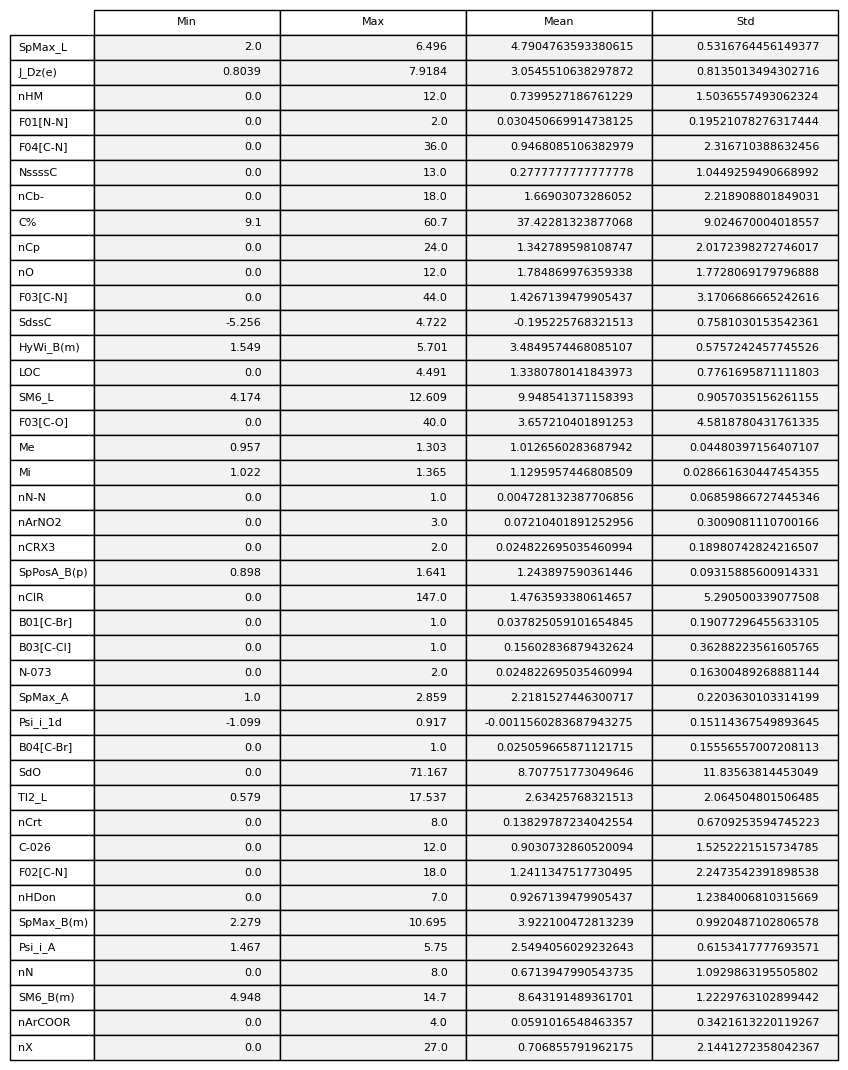

In [36]:
# Plot a table
plt.figsize = (20, 20)
table = plt.table(
    cellText=data_stats,
    rowLabels=feature_names,
    colLabels=["Min", "Max", "Mean", "Std"],
    loc="center",
    # Make the coll and row labels bold
    cellColours=[["#F2F2F2"] * 4] * NUM_FEATURES,
)
table.scale(1.5, 1.5)

# Remove the tick marks and labels from the axes
plt.axis("off")

# Use table.draw() to draw the table
plt.show()

#### Pie chart of the target variable

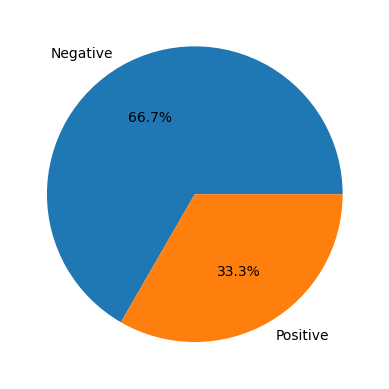

In [8]:
# Create a piechart of the target variable
negative = np.sum(y_train == 1)
positive = np.sum(y_train == 2)

plt.pie([negative, positive], labels=["Negative", "Positive"], autopct="%1.1f%%")
plt.show()

### Inputs-targets correlations

TODO

In [9]:
# Compute the correlation coefficient between each feature and the target
corr = np.abs(np.corrcoef(X_train, y_train)[0, 1:])

# Sort the features by their correlation coefficient
sorted_idx = np.argsort(corr)[::-1]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the correlation coefficients as a horizontal bar chart
ax.barh(np.arange(X_train.shape[1]), corr[sorted_idx])

# Set the yticks to show the feature indices
ax.set_yticks(np.arange(X_train.shape[1]))

# Set the ytick labels to show the feature names
feature_names = ...  # list of feature names
ax.set_yticklabels(np.array(feature_names)[sorted_idx])

# Add a title and display the plot
ax.set_title("Feature correlations")
plt.show()
    

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 41 and the array at index 1 has size 846

### 1.4. Encoding dependent variable ([1,2] -> [0,1])

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

y_train = labelencoder.fit_transform(y_train)
y_test = labelencoder.transform(y_test)

### 1.5. Feature Scaling

Use `standardization`: $X = \frac{X - \mu}{\sigma}$

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 2. Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

classifiers = dict()
classifiers_tuned = dict()

ModuleNotFoundError: No module named 'xgboost'

### 2.1 Logistic Regresssion

In [ ]:
lreg_classifier = LogisticRegression(random_state=0)
lreg_classifier.fit(X_train, y_train)
classifiers["Logistic Regression"] = lreg_classifier

#### Tuning the hyperparameters

In [ ]:
# Define the hyperparamter grid for logistic regression
parameters = {"C": [0.1, 1, 10, 100, 1000], "penalty": ["l1", "l2"], "solver": ["liblinear"]}
# Create the grid search object
lreg_tuned = GridSearchCV(
    estimator=lreg_classifier,
    param_grid=parameters,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
)
# Fit the grid search object to the training data
lreg_tuned.fit(X_train, y_train)
classifiers_tuned["Logistic Regression"] = lreg_tuned

### 2.2 K-Nearest Neighbors

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn_classifier.fit(X_train, y_train)
classifiers["K-Nearest Neighbors"] = knn_classifier

#### Tuning the hyperparameters

In [ ]:
parameters = {"n_neighbors": [3, 5, 7, 9, 11, 13, 15, 17, 19, 21], "metric": ["euclidean", "manhattan", "minkowski"]}
knn_tuned = GridSearchCV(
    estimator=knn_classifier,
    param_grid=parameters,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
)
knn_tuned.fit(X_train, y_train)
classifiers_tuned["K-Nearest Neighbors"] = knn_tuned

### 2.3 Kernel Support Vector Classifier

In [ ]:
svc_classifier = SVC(kernel="rbf", random_state=0)
svc_classifier.fit(X_train, y_train)
classifiers["Kernel Support Vector Classification"] = svc_classifier

#### Tuning the hyperparameters

In [ ]:
parameters = [
    {"C": [0.25, 0.5, 0.75, 1], "kernel": ["linear"]},
    {
        "C": [0.25, 0.5, 0.75, 1],
        "kernel": ["rbf"],
        "gamma": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    },
]
svc_classifier_tuned = GridSearchCV(
    estimator=svc_classifier,
    param_grid=parameters,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
)
svc_classifier_tuned.fit(X_train, y_train)
classifiers_tuned["Kernel Support Vector Classification"] = svc_classifier_tuned

### 2.4 Naive Bayes

In [ ]:
gauss_classifier = GaussianNB()
gauss_classifier.fit(X_train, y_train)
classifiers["Naive Bayes"] = gauss_classifier

### 2.5 Decision Tree Classifier 

In [ ]:
dtree_classifier = DecisionTreeClassifier(criterion="entropy", random_state=0)
dtree_classifier.fit(X_train, y_train)
classifiers["Decision Tree Classification"] = dtree_classifier

#### Tuning the hyperparameters

In [ ]:
parameters = {"criterion": ["gini", "entropy"], "max_depth": [3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20]}
dtree_classifier_tuned = GridSearchCV(
    estimator=dtree_classifier,
    param_grid=parameters,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
)
dtree_classifier_tuned.fit(X_train, y_train)
classifiers_tuned["Decision Tree Classification"] = dtree_classifier_tuned

### 2.6 Random Forest Classifier

In [ ]:
rfc_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc_classifier.fit(X_train, y_train)
classifiers ["Random Forest Classification"] = rfc_classifier

#### Tuning the hyperparameters

In [ ]:
parameters = {
    "n_estimators": [10, 50, 100, 200, 300, 400, 500],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 5, 10, 15, 20],
}
rfc_classifier_tuned = GridSearchCV(
    estimator=rfc_classifier,
    param_grid=parameters,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
)
rfc_classifier_tuned.fit(X_train, y_train)
classifiers_tuned["Random Forest Classification"] = rfc_classifier_tuned

### 2.7 XGBoost Classifier

In [ ]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
classifiers["XGBoost"] = xgb_classifier

#### Parameter tuning

In [ ]:
parameters = {
    "learning_rate": [0.01, 0.05, 0.1, 0.5, 1],
    "max_depth": [1, 3, 6],
    "reg_lambda": [0, 0.5, 1],
    "n_estimators": [100, 200, 300, 400, 500],
}
xgb_classifier_tuned = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=parameters,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
)
xgb_classifier_tuned.fit(X_train, y_train)
classifiers_tuned["XGBoost"] = xgb_classifier_tuned

## 3. Evaluation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
for classifier in classifiers:
    # Peroform k-fold cross validation
    accuracies = cross_val_score(estimator=classifiers[classifier], X=X_train, y=y_train, cv=10)
    print("-"*30 + classifier + "-"*30)
    print("Accuracy of {} is {:.2f} %".format(classifier, accuracies.mean()*100))
    print("Standard Deviation of {} is {:.2f} %".format(classifier, accuracies.std()*100))

------------------------------Logistic Regression------------------------------
Accuracy of Logistic Regression is 86.40 %
Standard Deviation of Logistic Regression is 4.29 %
------------------------------K-Nearest Neighbors------------------------------
Accuracy of K-Nearest Neighbors is 85.09 %
Standard Deviation of K-Nearest Neighbors is 5.19 %
------------------------------Kernel Support Vector Classification------------------------------
Accuracy of Kernel Support Vector Classification is 86.16 %
Standard Deviation of Kernel Support Vector Classification is 4.18 %
------------------------------Naive Bayes------------------------------
Accuracy of Naive Bayes is 67.36 %
Standard Deviation of Naive Bayes is 5.32 %
------------------------------Decision Tree Classification------------------------------
Accuracy of Decision Tree Classification is 80.00 %
Standard Deviation of Decision Tree Classification is 7.19 %
------------------------------Random Forest Classification-------------

In [ ]:
for classifier in classifiers_tuned:
    print("-"*30 + classifier + "-"*30)
    print("Best Accuracy of {} is {:.2f} %".format(classifier, classifiers_tuned[classifier].best_score_*100))
    print("Best Parameters of {} is {}".format(classifier, classifiers_tuned[classifier].best_params_))
    # print("Best Estimator of {} is {}".format(classifier, classifiers_tuned[classifier].best_estimator_))
    print("Standard Deviation of {} is {:.2f} %".format(classifier, classifiers_tuned[classifier].cv_results_["std_test_score"][classifiers_tuned[classifier].best_index_]*100))

------------------------------Logistic Regression------------------------------
Best Accuracy of Logistic Regression is 86.28 %
Best Parameters of Logistic Regression is {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Standard Deviation of Logistic Regression is 4.33 %
------------------------------K-Nearest Neighbors------------------------------
Best Accuracy of K-Nearest Neighbors is 85.32 %
Best Parameters of K-Nearest Neighbors is {'metric': 'manhattan', 'n_neighbors': 17}
Standard Deviation of K-Nearest Neighbors is 7.28 %
------------------------------Kernel Support Vector Classification------------------------------
Best Accuracy of Kernel Support Vector Classification is 86.64 %
Best Parameters of Kernel Support Vector Classification is {'C': 0.25, 'kernel': 'linear'}
Standard Deviation of Kernel Support Vector Classification is 3.89 %
------------------------------Decision Tree Classification------------------------------
Best Accuracy of Decision Tree Classification is 81.5